No mundo dos negócios, a taxa de churn, também conhecida como taxa de rotatividade de clientes
é um indicador crucial para avaliar a saúde e o sucesso de uma empresa. Ela representa a porcentagem de clientes 
que cancelam seus serviços ou produtos em um determinado período, geralmente mensal ou anual.

Objetivo aqui é criar um modelo de Chorn Análise, para solucionar este problema, 
prevendo potenciais saida de clientes 

In [1]:
import pandas as pd
import seaborn as srs
import statistics as sts

In [2]:
# Importando os dados
dados = pd.read_csv('Churn.csv', sep=';')
# Visualizando os dados
dados.head()

,X0,X1,X2,X3,X4,X4.1,X6,X7,X8,X9,X10,X11
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


In [3]:
# Temos um problema com os nomes das colunas, vamos começar a tratar
dados.columns=['Id', 'Score', 'Estado', 'Genero', 'Idade', 'Patrimonio', 'Saldo', 'Produto', 'TemCartCredito', 'Ativo','Salario', 'Saiu']
dados.head()

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produto,TemCartCredito,Ativo,Salario,Saiu
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


Agora vamos explorar os dados categoricos e dados numéricos

In [4]:
# Exolorando dados categóricos:
# Agrupando a coluna Estado para ver se tem algum problema
agrupado = dados.groupby(['Estado']).size()
agrupado

Estado
PR    257
RP      1
RS    478
SC    258
SP      4
TD      1
dtype: int64

In [5]:
# Agrupando o Genero para ver os valores e frequencia desses valores
agrupado = dados.groupby(['Genero']).size()
agrupado

Genero
F              2
Fem            1
Feminino     461
M              6
Masculino    521
dtype: int64

Explorando dados numéricos:

In [6]:
# Explorando colunas numéricas
dados['Score'].describe()

count    999.000000
mean     648.621622
std       98.264219
min      376.000000
25%      580.000000
50%      653.000000
75%      721.000000
max      850.000000
Name: Score, dtype: float64

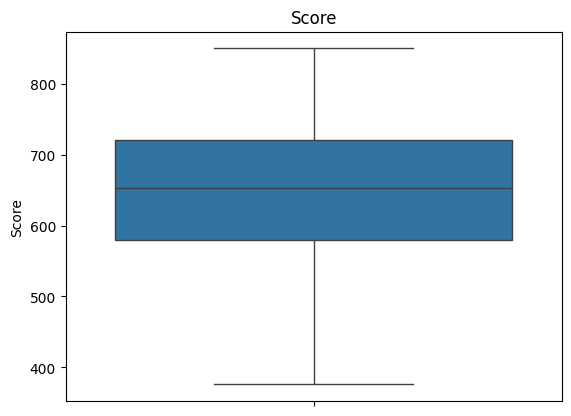

In [7]:
# A linha de código cria um boxplot que representa a distribuição 
#dos dados presentes na coluna Score do DataFrame dados
srs.boxplot(dados['Score']).set_title('Score');


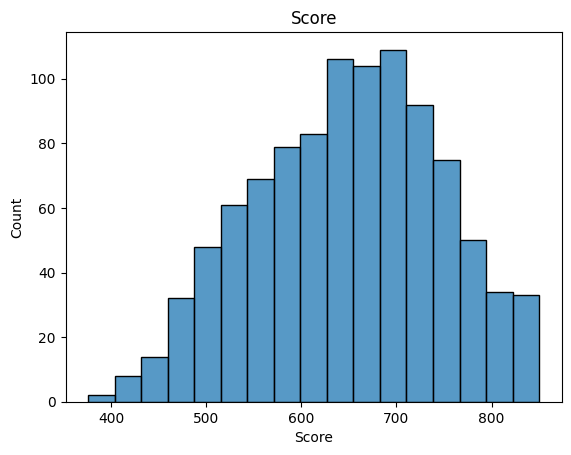

In [8]:
# A linha de código cria um histograma com (histplot) que representa a distribuição 
#dos dados presentes na coluna Score do DataFrame dados
srs.histplot(dados['Score']).set_title('Score');

In [9]:
# Seguindo com analise da coluna (Idade):
dados['Idade'].describe()

count    999.000000
mean      38.902903
std       11.401912
min      -20.000000
25%       32.000000
50%       37.000000
75%       44.000000
max      140.000000
Name: Idade, dtype: float64

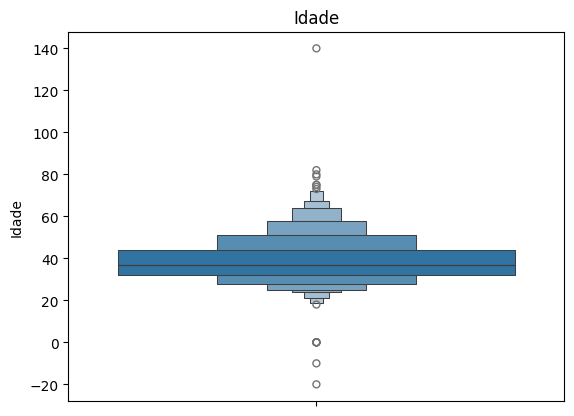

In [10]:
srs.boxenplot(dados['Idade']).set_title('Idade');

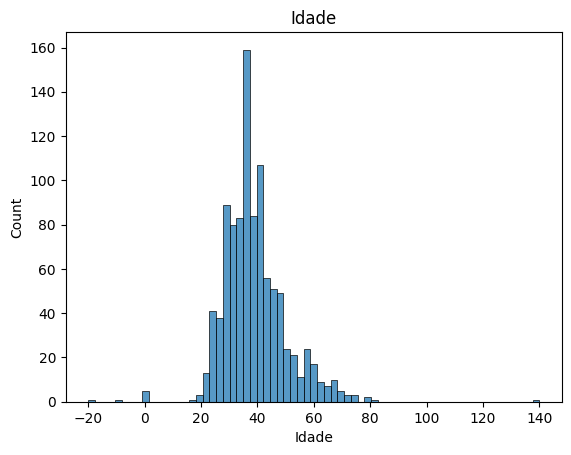

In [11]:
srs.histplot(dados['Idade']).set_title('Idade');

In [12]:
# Seguindo com analise da coluna (Saldo):
dados['Saldo'].describe()

count    9.990000e+02
mean     7.164928e+06
std      6.311840e+06
min      0.000000e+00
25%      0.000000e+00
50%      8.958835e+06
75%      1.258684e+07
max      2.117743e+07
Name: Saldo, dtype: float64

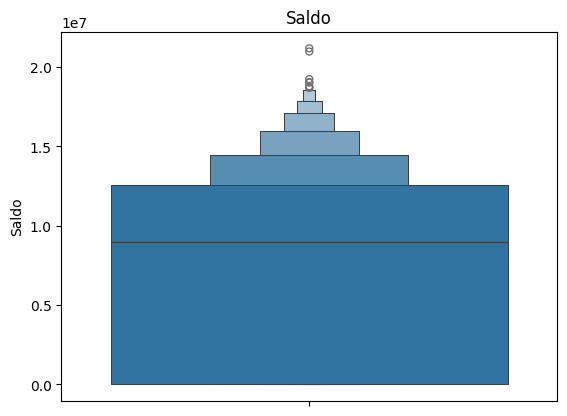

In [13]:
srs.boxenplot(dados['Saldo']).set_title('Saldo');

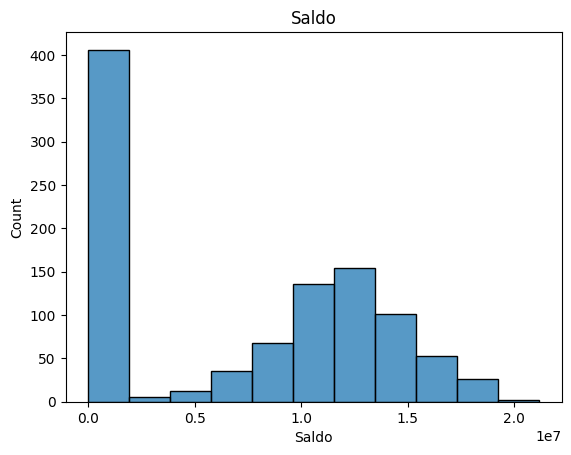

In [14]:
srs.histplot(dados['Saldo']).set_title('Saldo');

In [15]:
# Seguindo com analise da coluna (Saldo):
dados['Salario'].describe()

count    9.920000e+02
mean     3.528762e+07
std      5.305800e+08
min      9.677000e+03
25%      3.029011e+06
50%      8.703250e+06
75%      1.405213e+07
max      1.193469e+10
Name: Salario, dtype: float64

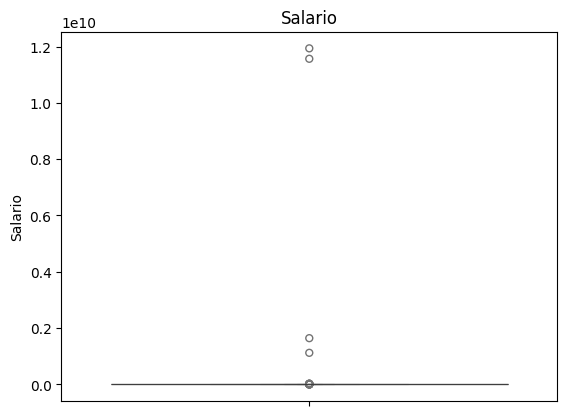

In [16]:
srs.boxenplot(dados['Salario']).set_title('Salario');

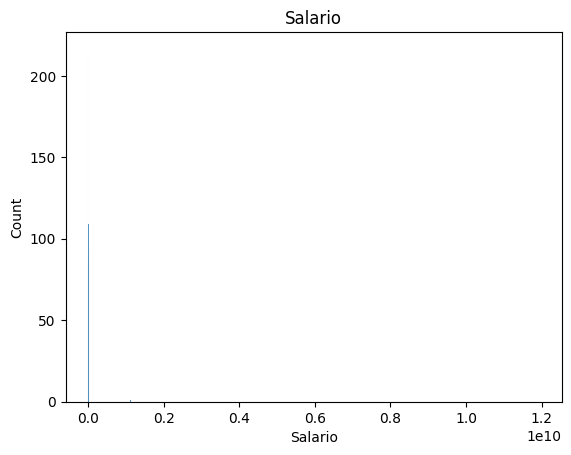

In [17]:
srs.histplot(dados['Salario']).set_title('Salario');

In [18]:
# Verificando se existem valores nulos a serem corrigidos
dados.isnull().sum()

Id                0
Score             0
Estado            0
Genero            8
Idade             0
Patrimonio        0
Saldo             0
Produto           0
TemCartCredito    0
Ativo             0
Salario           7
Saiu              0
dtype: int64

Ja foi feito as análises para descobrir problemas nos dados, e agora começo a tratar esses erros:

In [19]:
# Mostrando a mediana na coluna Salário, e o valor que vai ser usado para presncher os valores nulos
mediana = sts.median(dados['Salario'])
mediana

70518.0

In [20]:
# Subistituindo os valores nulos pela mediana na coluna Salaáio
#dados['Salario'].fillna(mediana, inplace=True)
dados.fillna({'Salario': mediana}, inplace=True)
# Verificando a coluna Salário, mostrando que ja não tem valores nulos
dados['Salario'].isnull().sum()


0

In [21]:
# Preencher os valores nulos da coluna Genero, preencher com o (moda) 
# valor masculino porque é o valor maior, o que mais ocorre, assim é o (moda) 
#dados['Genero'].fillna('Masculino', inplace=True)
dados.fillna({'Genero': 'Masculino'}, inplace=True)
dados['Genero'].isnull().sum()

0

In [22]:
# Agora resolvendo o problema da coluna Genero que está com valores marculino preenchido
# com (M) E Feminino preenchido com F, e Fem, tem que mudar para Masculino e Femnino
dados.loc[dados['Genero'] == 'M', 'Genero'] = 'Masculino'
dados.loc[dados['Genero'].isin(['F', 'Fem']),'Genero'] = 'Feminino'
agrupado = dados.groupby(['Genero']).size()
agrupado

Genero
Feminino     464
Masculino    535
dtype: int64

Agora vamos resolver problema com a coluna (Idade) que esta com valores de -20 e 140 de idade

In [23]:
# Esse código chama o datafreme mostrando a coluna Idade que ja foi identificada com problema de idade -0 e idade maior que 110
# esses valores serão substituidos pelo valor mediano
dados.loc[(dados['Idade'] < 0) | (dados['Idade'] > 110)]

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produto,TemCartCredito,Ativo,Salario,Saiu
867,869,636,RS,Feminino,-10,1,17083346,1,1,0,11051028.0,1
984,986,773,RS,Masculino,-20,1,12453278,2,0,1,1172357.0,0
990,992,655,RS,Masculino,140,5,93147,2,1,0,6621413.0,0


In [24]:
# Calculando a mediana
mediana = sts.median(dados['Idade'])
mediana

37

In [25]:
# Subistituindo os valores incorretos da tabela Idade pela mediana, esses valores serão trocados por Idade 37
dados.loc[(dados['Idade'] < 0) | (dados['Idade'] > 110),'Idade'] = mediana
# Já feito a substituição dos valores incorretos, checaremos se os valores foram alterados
dados.loc[(dados['Idade'] < 0) | (dados['Idade'] > 110)]

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produto,TemCartCredito,Ativo,Salario,Saiu


In [26]:
# Mostrando e tratamento dados duplicados na coluna Id
dados[dados.duplicated(['Id'],keep=False)]

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produto,TemCartCredito,Ativo,Salario,Saiu
80,81,665,RS,Feminino,34,1,9664554,2,0,0,17141366.0,0
81,81,665,RS,Feminino,34,1,9664554,2,0,0,17141366.0,0


In [27]:
# Tratamento dados duplicados na coluna Id, excluindo um dos Id duplicados
dados.drop_duplicates(subset='Id', keep='first', inplace=True)
dados[dados.duplicated(['Id'],keep=False)] # Visualizando se ainda tem dados duplicados

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produto,TemCartCredito,Ativo,Salario,Saiu


Agora resolvendo problema da coluna (Estado), tem valores errados, estados que n existem, e estado que está fora da empresa

In [28]:
# relembrando agrupando o Estado para ver os valores e frequencia desses valores
agrupado = dados.groupby(['Estado']).size()
agrupado

Estado
PR    257
RP      1
RS    477
SC    258
SP      4
TD      1
dtype: int64

In [29]:
# Tratando os erros de estados que n existem, subistituindo seu valores para (moda) que é o estado RS 
dados.loc[dados['Estado'].isin(['RP', 'SP', 'TD']), 'Estado'] = 'RS'
# Reagrupando para ver o resultado da coluna Estado já sem erros
agrupado = dados.groupby(['Estado']).size()
agrupado

Estado
PR    257
RS    483
SC    258
dtype: int64

In [30]:
# Tratamento de outliers da coluna Salário, considerando outiliers abaixo de 2* desvio padrão
DesvioP = sts.stdev(dados['Salario'])
DesvioP

528988918.4679201

In [31]:
# Verificando se tem salários maior que 2* o desvio padrão
dados.loc[dados['Salario'] >= 2 * DesvioP]

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produto,TemCartCredito,Ativo,Salario,Saiu
7,8,376,PR,Feminino,29,4,11504674,4,1,0,1.193469e+10,1
116,118,668,PR,Feminino,37,6,1678644,1,1,0,1.156383e+10,0
170,172,484,RS,Feminino,29,4,13011439,1,1,0,1.640179e+09,0
230,232,673,RS,Masculino,72,1,0,2,0,1,1.119812e+09,0


In [32]:
# Trocando essas 4 linhas que indicam outliers da coluna Salário pela mediana, para isso primeiro vamos calcular para ver o valor dessa mediana
mediana = sts.median(dados['Salario'])
mediana

8637195.5

In [33]:
# Mudando os valores que está em outliers para mediana
dados.loc[dados['Salario'] >= 2 * DesvioP, 'Salario'] = mediana
# Verificando resultado
dados.loc[dados['Salario']>= 2 * DesvioP] 

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produto,TemCartCredito,Ativo,Salario,Saiu


Finalizado todo o tratamento de dados coluna por coluna

In [34]:
dados.head()

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produto,TemCartCredito,Ativo,Salario,Saiu
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0
